# Project: Investigate a Dataset - [Twitter @We_Love_Dogs]



>Table of Contents <br>
>Introduction<br>
>Data Wrangling<br>
>Exploratory Data Analysis<br>
>Conclusions & Limitations<br>

## Introduction

>The dataset that you will be wrangling (and analyzing and visualizing) is the tweet archive of Twitter user @dog_rates, also known as WeRateDogs. WeRateDogs is a Twitter account that rates people's dogs with a humorous comment about the dog. 

## Data Set

> This Projects involves Several Datasets This data set contains information about 2000 tweets  collected from @WeRateDogs twitter account

In [1]:
from bs4 import BeautifulSoup
import csv
import requests
import json
import re
import os
from os.path import exists
import pathlib
import pandas as pd
from configparser import ConfigParser
import tweepy
import seaborn as sns
from scipy import stats
import statsmodels.graphics.api as smg
import statsmodels.api as sm
from matplotlib import pyplot as plt
import numpy as np
from timeit import default_timer as timer
from tweepy import OAuthHandler
%matplotlib inline

# Data Wrangling

> The data for this project  will be gathered from different sources, which are the Twitter Api and udacity website. The data consist of three diffrent datasets called, `df_twitter` table , `df_dog_image` table and `df_dog` table. Each dataset contains different data which are related to each other 

In [2]:
#creating a config object
config = ConfigParser()

In [3]:
#Reading the config file
config.read("C:\\Users\\hp\\Documents\\twitter_keys.ini")

['C:\\Users\\hp\\Documents\\twitter_keys.ini']

In [4]:
#Accessing elements
config.sections()

['Twitter_keys']

In [5]:
list(config['Twitter_keys'])

['consumer_key',
 'consumer_secret',
 'bearer_token',
 'access_token',
 'access_token_secret']

In [6]:
# Authentication
auth = OAuthHandler(
    config['Twitter_keys']['consumer_key'],
                     config['Twitter_keys']['consumer_secret'])

auth.set_access_token(
    config['Twitter_keys']['access_token'],
                     config['Twitter_keys']['access_token_secret'])

api = tweepy.API(auth, wait_on_rate_limit=True)


In [9]:
os.chdir("C:\\Users\\hp\\zzNoteBook\\Udacity_project")

In [10]:
a = os.getcwd()

if os.path.exists(a + '\\tweeter'):
     pass
else:
    os.mkdir('tweeter')

os.chdir(a  + '\\tweeter')


In [45]:
url ='https://d17h27t6h515a5.cloudfront.net/topher/2017/August/59a4e958_twitter-archive-enhanced/twitter-archive-enhanced.csv'

#saving The Csv file to the tweeter Folder
response = requests.get(url)
#save csv to file
with open("twitter_archive.csv", 'wb') as file:
    file.write(response.content)
    


In [142]:
df_dog = pd.read_csv('twitter_archive.csv')

In [41]:
a = df_dog.in_reply_to_status_id.isnull()
df_dog[~a]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
30,886267009285017600,8.862664e+17,2.281182e+09,2017-07-15 16:51:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@NonWhiteHat @MayhewMayhem omg hello tanner yo...,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
55,881633300179243008,8.816070e+17,4.738443e+07,2017-07-02 21:58:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@roushfenway These are good dogs but 17/10 is ...,NaN,NaN,NaN,NaN,17,10,None,None,None,None,None
64,879674319642796034,8.795538e+17,3.105441e+09,2017-06-27 12:14:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@RealKentMurphy 14/10 confirmed,NaN,NaN,NaN,NaN,14,10,None,None,None,None,None
113,870726314365509632,8.707262e+17,1.648776e+07,2017-06-02 19:38:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@ComplicitOwl @ShopWeRateDogs &gt;10/10 is res...,NaN,NaN,NaN,NaN,10,10,None,None,None,None,None
148,863427515083354112,8.634256e+17,7.759620e+07,2017-05-13 16:15:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@Jack_Septic_Eye I'd need a few more pics to p...,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2038,671550332464455680,6.715449e+17,4.196984e+09,2015-12-01 04:44:10 +0000,"<a href=""http://twitter.com/download/iphone"" r...",After 22 minutes of careful deliberation this ...,NaN,NaN,NaN,NaN,1,10,None,None,None,None,None
2149,669684865554620416,6.693544e+17,4.196984e+09,2015-11-26 01:11:28 +0000,"<a href=""http://twitter.com/download/iphone"" r...",After countless hours of research and hundreds...,NaN,NaN,NaN,NaN,11,10,None,None,None,None,None
2169,669353438988365824,6.678065e+17,4.196984e+09,2015-11-25 03:14:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tessa. She is also very pleased after ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/669353438...,10,10,Tessa,None,None,None,None
2189,668967877119254528,6.689207e+17,2.143566e+07,2015-11-24 01:42:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",12/10 good shit Bubka\n@wane15,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None


In [143]:
df_dog.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1241,712065007010385924,NaN,NaN,2016-03-21 23:55:01 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Chester. He's clearly in charge of the...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/712065007...,6,10,Chester,None,None,None,None
423,821765923262631936,NaN,NaN,2017-01-18 17:07:18 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Duchess. She uses dark doggo forces to...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/821765923...,13,10,Duchess,doggo,None,None,None
2342,666082916733198337,NaN,NaN,2015-11-16 02:38:37 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a well-established sunblockerspan...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666082916...,6,10,None,None,None,None,None
1808,676897532954456065,NaN,NaN,2015-12-15 22:52:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Exotic handheld dog here. Appears unathletic. ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/676897532...,5,10,None,None,None,None,None
984,749317047558017024,NaN,NaN,2016-07-02 19:01:20 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Blu. He's a wild bush Floofer. I wish ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/749317047...,12,10,Blu,None,floofer,None,None


In [42]:
df_dog.iloc[3].source

'<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>'

In [49]:
df_dog.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [36]:
df_dog.name.value_counts()                        

None          745
a              55
Charlie        12
Cooper         11
Lucy           11
             ... 
Dex             1
Ace             1
Tayzie          1
Grizzie         1
Christoper      1
Name: name, Length: 957, dtype: int64

In [21]:
df_dog.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [23]:
df_dog.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

In [24]:
df_dog.duplicated().sum()

0

>The df_dog dataframe contains sevral empty rows of data across the table and no null values

In [12]:
tweet_ids = df_dog.tweet_id.values

In [1]:
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file

with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.errors.TweepyException as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

In [12]:
os.getcwd()

'C:\\Users\\hp\\zzNoteBook\\Udacity_project\\tweeter'

In [2]:
df_list =[]
with open("tweet_json.txt", 'r') as tweet_data:
          for line in tweet_data:
            data = json.loads(line)
            tweet_id= data['id']
            created_at = data['created_at']
            favourite_count=  data['favorite_count']
            retweet_count = data['retweet_count']
            
            df_list.append({'tweet_id': tweet_id,
               'date_created': created_at,
                'favourite_count': favourite_count,
                'retweet_count' : retweet_count
               
               })
        


In [132]:
df_twitter =pd.DataFrame(df_list, columns = ['tweet_id', 'date_created','favourite_count', 'retweet_count'])

In [4]:
df_twitter.shape

(2354, 4)

In [11]:
#sampling the dataframe 
df_twitter.sample(5)

,tweet_id,date_created,favourite_count,retweet_count
2116,670420569653809152,Sat Nov 28 01:54:54 +0000 2015,668,342
1845,675820929667219457,Sat Dec 12 23:34:00 +0000 2015,1140,260
1520,690649993829576704,Fri Jan 22 21:39:24 +0000 2016,1435,325
498,813127251579564032,Sun Dec 25 21:00:18 +0000 2016,13242,3652
551,804413760345620481,Thu Dec 01 19:56:00 +0000 2016,0,3712


In [50]:
df_twitter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   tweet_id         2354 non-null   int64 
 1   date_created     2354 non-null   object
 2   favourite_count  2354 non-null   int64 
 3   retweet_count    2354 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 73.7+ KB


> The tweet_id, date_created , favourite_count retweet_count columns are in the right data format

In [10]:
df_twitter.describe()

,tweet_id,favourite_count,retweet_count
count,2.354000e+03,2354.000000,2354.000000
mean,7.426978e+17,8080.968564,3164.797366
std,6.852812e+16,11814.771334,5284.770364
min,6.660209e+17,0.000000,0.000000
25%,6.783975e+17,1415.000000,624.500000
50%,7.194596e+17,3603.500000,1473.500000
75%,7.993058e+17,10122.250000,3652.000000
max,8.924206e+17,132810.000000,79515.000000


In [15]:
# checking for duplicated rows
df_twitter.duplicated().sum()


0

In [17]:
df_twitter.duplicated().isnull().sum()

0

> The df_twitter dataframe do not contain duplicate rows and no null values 

In [40]:
url = ' https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'

response = requests.get(url)

# Save csv to file
    
with open("rateDogs_images.tsv", 'wb') as file:
    file.write(response.content)
    

In [134]:
df_dog_image = pd.read_csv('rateDogs_images.tsv', sep  = '\t')

In [44]:
df_dog_image.shape

(2075, 12)

In [8]:
df_dog_image.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [7]:
df_dog_image.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1365,761599872357261312,https://pbs.twimg.com/media/CpG_CrlWYAYyuP3.jpg,1,Gordon_setter,0.240427,True,Saluki,0.224269,True,Doberman,0.129730,True
681,683828599284170753,https://pbs.twimg.com/media/CX1ye7HUMAADDzh.jpg,1,malamute,0.577376,True,Siberian_husky,0.287131,True,Eskimo_dog,0.117563,True
971,706593038911545345,https://pbs.twimg.com/media/Cc5Snc7XIAAMidF.jpg,1,four-poster,0.696423,False,quilt,0.189312,False,pillow,0.029409,False
292,671186162933985280,https://pbs.twimg.com/media/CVCIQX7UkAEzqh_.jpg,1,Chihuahua,0.319106,True,whippet,0.169134,True,toy_terrier,0.125815,True
1078,717790033953034240,https://pbs.twimg.com/media/CfYaOeMWQAAGfyP.jpg,1,car_mirror,0.819106,False,minibus,0.107383,False,cab,0.034846,False


In [35]:
df_dog_image.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [58]:
df_dog_image.shape

(2075, 12)

In [33]:
df_dog_image.isnull().sum()

tweet_id    0
jpg_url     0
img_num     0
p1          0
p1_conf     0
p1_dog      0
p2          0
p2_conf     0
p2_dog      0
p3          0
p3_conf     0
p3_dog      0
dtype: int64

In [34]:
df_dog_image.duplicated().sum()

0

>The df_dog_image table doesnt conatain any duplicate rows and null values

# Clean

### Quality Issues
##### `Df_Dog` table
- The Timestamp isn't in the proper Format
- The Denorminator ratings has several below and above 10 
- The numerator ratings has several outliers 
- Retweet are duplicates of the original tweets (duplicate rows)
- in_reply_to_status_id column missing several rows
- in_reply_to_user_id column missing several rows
- The source columns contains information on the device and tweet link



##### `df_Twitter` table
- Date_created not in the proper format

##### `df_merge` table
- The date_created and Timestamp columns contain the same data
- The retweets and reply columns contain no data


### Tidniess
##### `df_Dog` table
- `Floofer`, `doggo`, `pupper`, and `puppo` columns all contain the same data
- information about tweets are spread across three different dataframes




In [144]:
#creating Copy for each dataframe to keep the Original 
df_dog_copy = df_dog
df_dog_image_copy = df_dog_image.copy()
df_twitter_copy = df_twitter.copy()


> For data consistency and consistency a copy of the original dataframe will be kept 



**Define**

#issue 1
- The Timestamp column isn't in the proper format from the `Df_dog table`

**Code**

In [136]:
df_dog_copy['timestamp'] = pd.to_datetime(df_dog_copy['timestamp']) 

**Test**

In [137]:
df_dog_copy['timestamp'].info()

<class 'pandas.core.series.Series'>
Int64Index: 2097 entries, 0 to 2355
Series name: timestamp
Non-Null Count  Dtype              
--------------  -----              
2097 non-null   datetime64[ns, UTC]
dtypes: datetime64[ns, UTC](1)
memory usage: 32.8 KB


**# issue 2**

**Define**

- The doggo, floofer, pupper, puppo contains the same data in the `Df_Dog` table

**Code**

In [145]:
dogs = [] # Creating a list to hold the values 

# 
for i in range(len(df_dog)):
        
    if (df_dog_copy.iloc[i].doggo == 'doggo'):
         dogs.append(df_dog_copy.iloc[i].doggo)
            
    elif (df_dog_copy.iloc[i].floofer == 'floofer'):
        dogs.append(df_dog_copy.iloc[i].floofer)
        
    elif (df_dog_copy.iloc[i].pupper == 'pupper'):
        dogs.append(df_dog_copy.iloc[i].pupper)

    elif (df_dog_copy.iloc[i].puppo == 'puppo'):
         dogs.append(df_dog_copy.iloc[i].puppo)
            
    else: dogs.append('None')
    
        
df_dog_copy['state'] = dogs      

In [146]:
df_dog_copy.drop(columns = ['doggo','floofer','pupper','puppo'], inplace = True)

**Test**

In [147]:
df_dog_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  state                       2356 

**#issue 3**

**Define**

- The Numerator has several outliers i.e not within the accepted range in the `Df_Dog` table

**code**

In [148]:
# numerator cannot go below 10
df_dog_copy.rating_numerator.describe()

count    2356.000000
mean       13.126486
std        45.876648
min         0.000000
25%        10.000000
50%        11.000000
75%        12.000000
max      1776.000000
Name: rating_numerator, dtype: float64

In [149]:
_a = df_dog_copy.rating_numerator < 10 #filter for values below 10
b = df_dog_copy[_a].index #getting the index of values below 10 


In [150]:
# Creating a list of rating_numerator values
rating = list(df_dog_copy.rating_numerator)

In [151]:
for i in b:
    rating[i] = 11

df_dog_copy['rating_numerator'] = rating #Assigning the list to the DataFrame

**Test**

In [152]:
df_dog_copy.rating_numerator.describe()

count    2356.000000
mean       13.842954
std        45.798506
min        10.000000
25%        11.000000
50%        11.000000
75%        12.000000
max      1776.000000
Name: rating_numerator, dtype: float64

**#issue 4**

**Define**

The source columns contains information on the phone and tweet link

**code**

In [153]:
# the second row 
df_dog_copy.iloc[1].source

'<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>'

In [154]:
a = df_dog_copy.source.str.split('"')

In [155]:
link = []
device = []

for i in range(len(a)):
    k = a[i][1]
    j = a[i][4][-10:-4]
    link.append(k)
    device.append(j)

In [156]:
df_dog_copy['Soure_link'] = link
df_dog_copy['device'] = device

In [157]:
df_dog_copy.drop(columns = ['source'], inplace = True)

**Test**

In [158]:
df_dog_copy.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,state,Soure_link,device
1777,677918531514703872,NaN,NaN,2015-12-18 18:29:07 +0000,"""Everything looks pretty good in there. Make s...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/677918531...,10,10,None,None,http://twitter.com/download/iphone,iPhone
1710,680583894916304897,NaN,NaN,2015-12-26 03:00:19 +0000,This is Penny. Her tennis ball slowly rolled d...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/680583894...,11,10,Penny,None,http://twitter.com/download/iphone,iPhone
349,831650051525054464,NaN,NaN,2017-02-14 23:43:18 +0000,"I usually only share these on Friday's, but th...",NaN,NaN,NaN,"http://www.gofundme.com/bluethewhitehusky,http...",13,10,None,None,http://twitter.com/download/iphone,iPhone
2227,668268907921326080,NaN,NaN,2015-11-22 03:24:58 +0000,Here we have an Azerbaijani Buttermilk named G...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/668268907...,10,10,None,None,http://twitter.com/download/iphone,iPhone
1840,675888385639251968,NaN,NaN,2015-12-13 04:02:03 +0000,Breathtaking scene. A father taking care of hi...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/675888385...,10,10,None,None,http://twitter.com/download/iphone,iPhone


**#Issue 5**

**Define**

The rating_denominator having Values other than 10 in the `Df_Dog` table

**Code**

In [159]:
a = (df_dog_copy.rating_numerator != 10)  #filter for values below 10 and above
b = df_dog_copy[a].index #getting the index of values below 10 


In [160]:
_denominator = list(df_dog.rating_denominator)

In [161]:
for i in b:
    _denominator[i] = 10

df_dog_copy['rating_denominator'] = _denominator #Assigning the list to the DataFrame

**Test**

In [162]:
df_dog_copy.rating_denominator.describe()

count    2356.0
mean       10.0
std         0.0
min        10.0
25%        10.0
50%        10.0
75%        10.0
max        10.0
Name: rating_denominator, dtype: float64

#issue 6

**Define**

- Retweet are duplicates of the original tweets (duplicate rows) in the `Df_Dog` table


**Code**

In [163]:
#dropping retweets rows
a = df_dog_copy.retweeted_status_id.isna()
df_dog_copy[~a]
df_dog_copy.drop(index = df_dog[~a].index, inplace =  True) 

**Test**

In [164]:
df_dog_copy[~a]

C:\Users\hp\AppData\Local\Temp\ipykernel_12356\2545446675.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_dog_copy[~a]


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,state,Soure_link,device


In [165]:
df_dog_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2175 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2175 non-null   object 
 4   text                        2175 non-null   object 
 5   retweeted_status_id         0 non-null      float64
 6   retweeted_status_user_id    0 non-null      float64
 7   retweeted_status_timestamp  0 non-null      object 
 8   expanded_urls               2117 non-null   object 
 9   rating_numerator            2175 non-null   int64  
 10  rating_denominator          2175 non-null   int64  
 11  name                        2175 non-null   object 
 12  state                       2175 non-null   object 
 13  Soure_link                  2175 

#issue 7

**Define**

- Date_created isn't in the proper format i.e Datetime format in the `df_twitter` table


**Code**

In [166]:
df_twitter_copy.date_created = pd.to_datetime(df_twitter['date_created'])

 **Test**

In [167]:
df_twitter_copy.date_created.info()

<class 'pandas.core.series.Series'>
RangeIndex: 2354 entries, 0 to 2353
Series name: date_created
Non-Null Count  Dtype              
--------------  -----              
2354 non-null   datetime64[ns, UTC]
dtypes: datetime64[ns, UTC](1)
memory usage: 18.5 KB


#issue 9

**Define**

in_reply_to_status_id column missing several rows <br>
in_reply_to_user_id column missing several rows

In [168]:
a = df_dog_copy.in_reply_to_status_id.isna()
df_dog_copy[~a]
df_dog_copy.drop(index = df_dog_copy[~a].index, inplace = True)

**Test**

In [108]:
df_dog_copy[~a]

C:\Users\hp\AppData\Local\Temp\ipykernel_12356\2545446675.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_dog_copy[~a]


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,Soure_link,device


#issues 8

**Define**

Merge the `df_Twitter_copy`, `df_dog_copy Table` and `df_twitter_img_copy table`

**Code**

In [169]:
df_dog_merge = pd.merge(df_twitter_copy, df_dog_copy, on = "tweet_id", )

In [170]:
df_dog_merge = pd.merge(df_dog_merge, df_dog_image, on = "tweet_id", )

**Test**

In [171]:
df_dog_merge.shape

(1971, 29)

In [172]:
df_dog_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 0 to 1970
Data columns (total 29 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    1971 non-null   int64              
 1   date_created                1971 non-null   datetime64[ns, UTC]
 2   favourite_count             1971 non-null   int64              
 3   retweet_count               1971 non-null   int64              
 4   in_reply_to_status_id       0 non-null      float64            
 5   in_reply_to_user_id         0 non-null      float64            
 6   timestamp                   1971 non-null   object             
 7   text                        1971 non-null   object             
 8   retweeted_status_id         0 non-null      float64            
 9   retweeted_status_user_id    0 non-null      float64            
 10  retweeted_status_timestamp  0 non-null      object          

#issue 9

**Define**

The df_dog_merge contains duplicate data the time column and the date_created column

**Code**

In [187]:
df_dog_merge.drop(columns = 'timestamp', inplace = True)

**Test**

In [189]:
df_dog_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 0 to 1970
Data columns (total 23 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1971 non-null   int64              
 1   date_created        1971 non-null   datetime64[ns, UTC]
 2   favourite_count     1971 non-null   int64              
 3   retweet_count       1971 non-null   int64              
 4   text                1971 non-null   object             
 5   expanded_urls       1971 non-null   object             
 6   rating_numerator    1971 non-null   int64              
 7   rating_denominator  1971 non-null   int64              
 8   name                1971 non-null   object             
 9   state               1971 non-null   object             
 10  Soure_link          1971 non-null   object             
 11  device              1971 non-null   object             
 12  jpg_url             1971 non-null 

#issue 10


**Define**

The df_dog_merge contains several empty columns

**code**

In [184]:
df_dog_merge.drop(columns = ['retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp','in_reply_to_status_id' ,'in_reply_to_user_id' ], inplace = True)

In [190]:
df_dog_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 0 to 1970
Data columns (total 23 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1971 non-null   int64              
 1   date_created        1971 non-null   datetime64[ns, UTC]
 2   favourite_count     1971 non-null   int64              
 3   retweet_count       1971 non-null   int64              
 4   text                1971 non-null   object             
 5   expanded_urls       1971 non-null   object             
 6   rating_numerator    1971 non-null   int64              
 7   rating_denominator  1971 non-null   int64              
 8   name                1971 non-null   object             
 9   state               1971 non-null   object             
 10  Soure_link          1971 non-null   object             
 11  device              1971 non-null   object             
 12  jpg_url             1971 non-null 

In [191]:
#exporting the merged table
df_dog_merge.to_csv('Master_file.csv', index = False)

In [174]:
#creating a copy of the merged csv file
df_dog_merge_copy = df_dog_merge.copy()

# Analysis

Analyzing the P1 P2 and P3 confidence_levels 

In [132]:
#creating new dataframe
D = {  'p1_conf' : df_dog_image.p1_conf,
     'p2_conf' : df_dog_image.p2_conf,
     'p3_conf' : df_dog_image.p3_conf    
}
conf = pd.DataFrame(D)

In [74]:
conf.describe()

,p1_conf,p2_conf,p3_conf
count,2075.000000,2.075000e+03,2.075000e+03
mean,0.594548,1.345886e-01,6.032417e-02
std,0.271174,1.006657e-01,5.090593e-02
min,0.044333,1.011300e-08,1.740170e-10
25%,0.364412,5.388625e-02,1.622240e-02
50%,0.588230,1.181810e-01,4.944380e-02
75%,0.843855,1.955655e-01,9.180755e-02
max,1.000000,4.880140e-01,2.734190e-01


>The first predictions has the highest confidence levels, while p2 and p3 has lower confidence levels. For this analysis  each prediction with a True tag and confidence level above 50% will be filtered out and the highest prediction selected from each row.

In [93]:
#filter for Tag of True and Confidence_level above 50%
a = ((df_dog_merge.p1_dog == True) & (df_dog_merge.p1_conf > 0.50)) | ((df_dog_merge.p2_dog == True) & (df_dog_merge.p2_conf > 0.50)) | ((df_dog_merge.p3_dog == True) & (df_dog_merge.p3_conf > 0.50))


In [94]:
#creating a copy of the filtered Dataframe
df_dog1 = df_dog_merge[a]

> Because each imagie has 3 pridictions selecting the most probable prediction ie the prediction with the highest confidece level out of the series we are selecting prediction from each row i.e the prediction with the highest confidence level

In [95]:

dog_list = [] #list for dogs
dog_list_conf = [] #list for confidece levels
retweet_count = [] #list for retweet count
favourite_count =[] #list for favourite count
for i in range(len(df_dog1)):
    if (df_dog1.iloc[i].p1_conf > df_dog1.iloc[i].p2_conf) & (df_dog1.iloc[i].p1_conf > df_dog1.iloc[i].p3_conf):
        dog_list.append(df_dog1.iloc[i].p1)
        dog_list_conf.append(df_dog1.iloc[i].p1_conf)
        retweet_count.append(df_dog1.iloc[i].retweet_count)
        favourite_count.append(df_dog1.iloc[i].favourite_count)
        
        
    elif (df_dog1.iloc[i].p2_conf > df_dog1.iloc[i].p2_conf) & (df_dog1.iloc[i].p1_conf > df_dog1.iloc[i].p3_conf):
        dog_list.append(df_dog1.iloc[i].p2)
        dog_list_conf.append(df_dog1.iloc[i].p2_conf)
        retweet_count.append(df_dog1.iloc[i].retweet_count)
        favourite_count.append(df_dog1.iloc[i].favourite_count)
        
    else:(dog_list.append(df_dog1.iloc[i].p3_conf) , dog_list_conf.append(df_dog1.iloc[i].p3),
          retweet_count.append(df_dog1.iloc[i].retweet_count, favourite_count.append(df_dog1.iloc[i].favourite_count)))
         

### Question 1
> -  What Dog has the highest favorite counts
> - What dogs is the most popular breed of dog and how confident was the prediction 

In [96]:
#creating a new dataframe with the extracted data
D = {
    'dog_list' :dog_list, #list for dogs
'dog_list_conf' : dog_list_conf, #list for confidece levels
'retweet_count' : retweet_count, #list for retweet count
'favourite_count' : favourite_count 
}

df_prediction = pd.DataFrame(D)

In [97]:
df_prediction.head(3)

,dog_list,dog_list_conf,retweet_count,favourite_count
0,Chihuahua,0.716012,4328,25461
1,basset,0.555712,9774,41048
2,Pomeranian,0.566142,16716,56848


In [98]:
#grouping dogs by breed
mn = df_prediction.groupby('dog_list')

In [99]:
df_avg = mn.mean().sort_values(by = 'favourite_count',ascending = False )

In [100]:
df_avg.reset_index(inplace = True)
df_avg = df_avg.rename(columns = {
    'dog_list_conf': 'Avg_dog_conf', 'retweet_count' : 'Avg_retweet_count', 'favourite_count' :'Avg_favourite_count'})

,dog_list,Avg_favourite_count
0,Saluki,30932.000000
1,Irish_water_spaniel,25225.000000
2,French_bulldog,18099.363636
3,Afghan_hound,17305.000000
4,Eskimo_dog,17148.000000


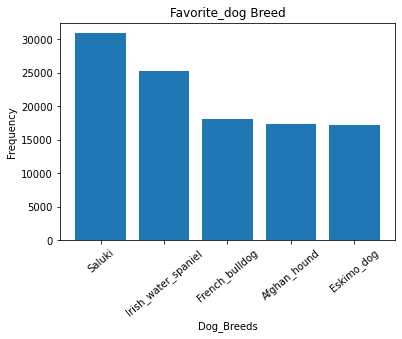

In [101]:
a = list(df_avg.dog_list.head(5))
b=  list(df_avg.Avg_favourite_count.head(5))
D = {
    'dog_list' : a,
    'Avg_favourite_count' : b
}
plt.bar(a,b);
plt.title ('Favorite_dog Breed');
plt.xlabel('Dog_Breeds');     # Label the 'x' axis
plt.ylabel('Frequency');
plt.xticks(rotation = 40);
pd.DataFrame(D)


> - The Saluki dog breed is the most favorite image

,dog_list
golden_retriever,126
Pembroke,70
Labrador_retriever,69
Chihuahua,50
pug,45


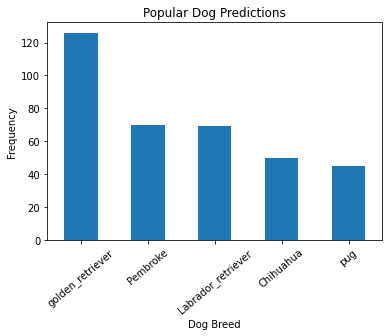

In [103]:
df_prediction.dog_list.value_counts().head(5).plot(
    kind =  'bar', xlabel = 'Dog Breed', ylabel = 'Frequency', title = 'Popular Dog Predictions')

plt.xticks(rotation = 40);

pd.DataFrame(df_prediction.dog_list.value_counts().head(5))


> The Most popular dog breed predicted is the Golden_retriver

In [104]:
df_avg.head(3)

,dog_list,Avg_dog_conf,Avg_retweet_count,Avg_favourite_count
0,Saluki,0.535929,6508.000000,30932.000000
1,Irish_water_spaniel,0.567475,6039.000000,25225.000000
2,French_bulldog,0.847845,4933.954545,18099.363636


corelation = (-0.18349260409137053, 0.06763885686984149)


,dog_list,Avg_dog_conf,Avg_favourite_count
0,Saluki,0.535929,30932.000000
1,Irish_water_spaniel,0.567475,25225.000000
2,French_bulldog,0.847845,18099.363636
3,Afghan_hound,0.903712,17305.000000
4,Eskimo_dog,0.576585,17148.000000
5,black-and-tan_coonhound,0.692000,17012.000000
6,Newfoundland,0.626441,16014.500000
7,Chesapeake_Bay_retriever,0.765541,15104.272727
8,Leonberg,0.681635,14934.333333
9,Great_Pyrenees,0.798408,14735.333333


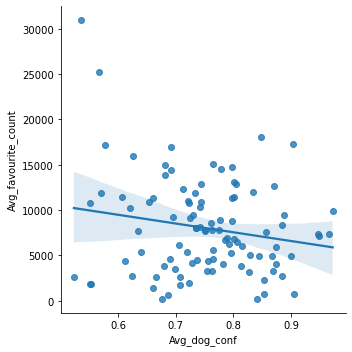

In [105]:
#does a corolation exist between confidnce_level and favorite
D = {'dog_list' : df_avg.dog_list,
    'Avg_favourite_count': df_avg.Avg_favourite_count,
    'Avg_dog_conf' : df_avg.Avg_dog_conf   
}
Data = pd.DataFrame(D, columns = ['dog_list','Avg_dog_conf','Avg_favourite_count'])
sns.lmplot(x= 'Avg_dog_conf', y= 'Avg_favourite_count', data = df_avg )

cor = stats.pearsonr(Data['Avg_dog_conf'], Data['Avg_favourite_count'])

print('corelation =',cor)
Data.head(10)

> The correlation between the confidence_levels and Average favorite_count is 0.06 indicating a very low relationship between both variables.

# Conclusion


> 1. The most popular dog breed is the Golden retriever, with over 100 predictions over 50% and an averaage prediction score of  80% 

> 2. The Dog breed with the most likes for an image tweet is the Saluki, with over 30932 favorites on twitter and with an  average prediction score of 54% 

>3. There is no relationship between image prediction confidence levels and average_favourite_count with a corelation coefficent of 0.06 

# Limitations

> 1. This Analysis was based on a small sample of the data set, only prediction over 50% was used in the analysis, this isn't a      proper representative of the original dataset.

>2. The average size of the sample isn't a proper representation of the entire dataset